C:\Users\Jorge Morales\AppData\Local\Temp\ipykernel_30364\1709997168.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.values, y=missing_values.index, palette="viridis")


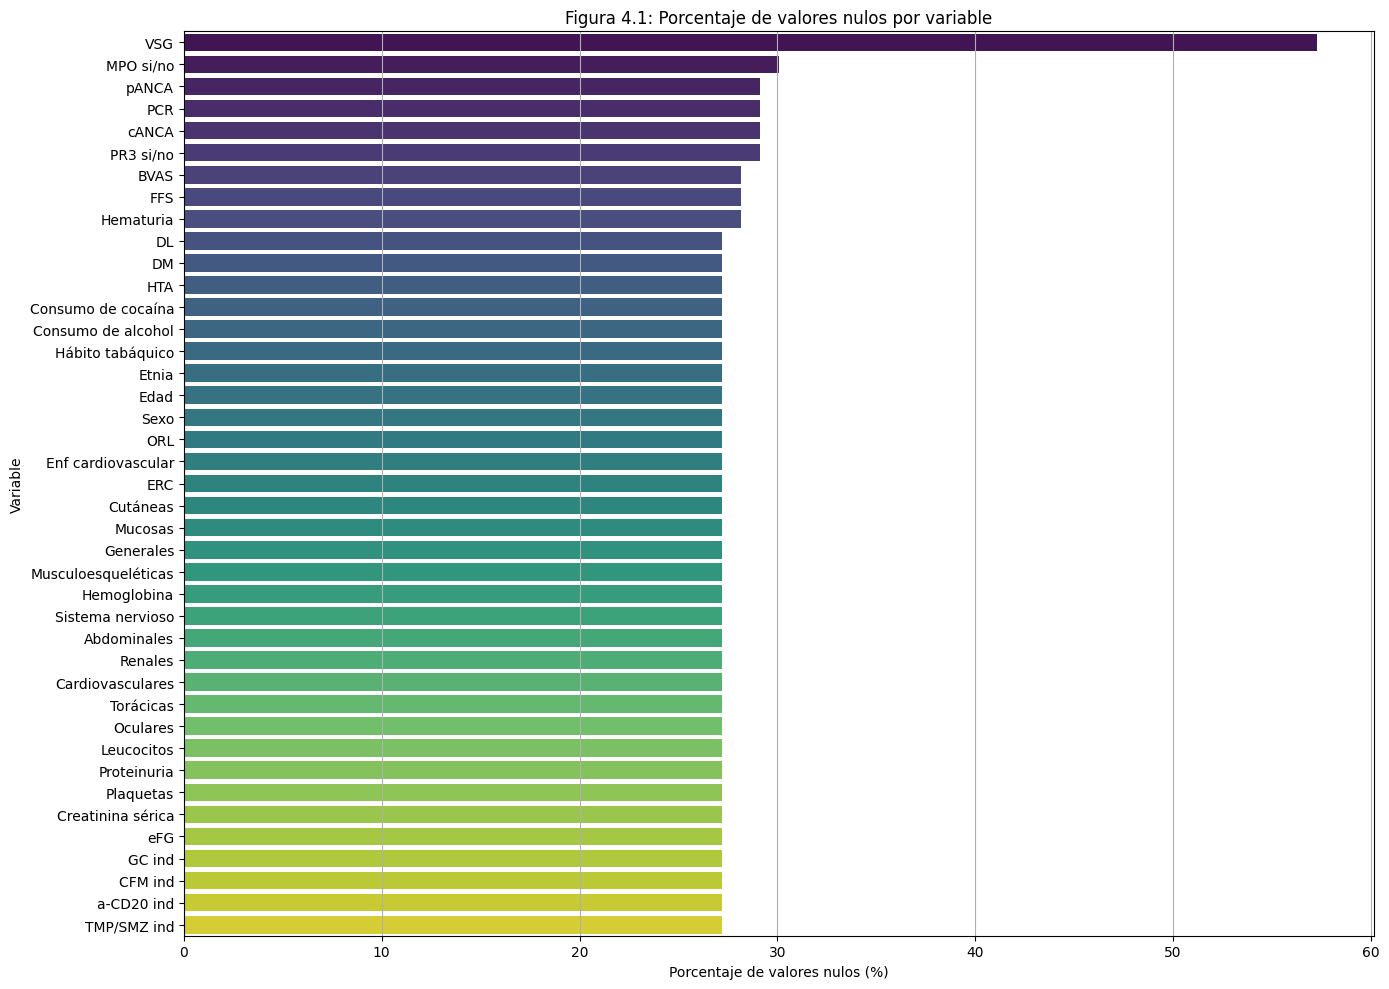

In [1]:
# ===========================================
# 📚 LIBRERÍAS NECESARIAS
# ===========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# ===========================================
# 📂 CARGA DEL ARCHIVO
# ===========================================
# Cargar el Excel tomando la fila 2 como cabecera real
ruta_archivo = 'Vasculitis-TFG final sin nhc revisado2.xlsx'  # Ajusta si tu archivo tiene otro nombre
df = pd.read_excel(ruta_archivo, header=2)

# ===========================================
# 🛠️ TRANSFORMACIONES INICIALES
# ===========================================
# Convertir 'Fecha nacimiento' en 'Edad' si no existe
if 'Fecha nacimiento' in df.columns:
    current_year = datetime.now().year
    df['Edad'] = current_year - pd.to_datetime(df['Fecha nacimiento'], errors='coerce').dt.year

# ===========================================
# 📋 VARIABLES SELECCIONADAS
# ===========================================
variables_seleccionadas = [
    'Sexo', 'Edad', 'Etnia', 'Hábito tabáquico', 'Consumo de alcohol', 'Consumo de cocaína', 'HTA', 'DM',
    'DL', 'Enf cardiovascular', 'ERC', 'Generales', 'Musculoesqueléticas', 'Cutáneas', 'Mucosas', 'Oculares',
    'ORL', 'Torácicas', 'Cardiovasculares', 'Abdominales', 'Renales', 'Sistema nervioso', 'VSG', 'PCR',
    'Hemoglobina', 'Leucocitos', 'Plaquetas', 'Creatinina sérica', 'eFG', 'Hematuria', 'Proteinuria',
    'pANCA', 'cANCA', 'MPO si/no', 'PR3 si/no', 'BVAS', 'FFS', 'GC ind', 'CFM ind', 'a-CD20 ind', 'TMP/SMZ ind'
]

# Filtrar solo las variables de interés
df_model = df[variables_seleccionadas]

# ===========================================
# 🔍 ANALISIS EXPLORATORIO INICIAL
# ===========================================

# 1. Completitud de datos
missing_values = df_model.isnull().mean() * 100
missing_values = missing_values.sort_values(ascending=False)

# 2. Gráfico de porcentaje de valores nulos
plt.figure(figsize=(14, 10))
sns.barplot(x=missing_values.values, y=missing_values.index, palette="viridis")
plt.title('Figura 4.1: Porcentaje de valores nulos por variable')
plt.xlabel('Porcentaje de valores nulos (%)')
plt.ylabel('Variable')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# ===========================================
# (Opcional) Guardar el nuevo dataset limpio
# ===========================================
# df_model.to_csv('vasculitis-dataset-limpio.csv', index=False)


In [3]:
df_model.describe

<bound method NDFrame.describe of      Sexo  Edad  Etnia  Hábito tabáquico  Consumo de alcohol  \
0     1.0  94.0    1.0               0.0                 0.0   
1     1.0  58.0    2.0               0.0                 0.0   
2     1.0  73.0    1.0               0.0                 0.0   
3     1.0  88.0    1.0               0.0                 0.0   
4     0.0  78.0    1.0               1.0                 1.0   
..    ...   ...    ...               ...                 ...   
98    1.0  79.0    1.0               0.0                 0.0   
99    0.0  73.0    1.0               0.0                 0.0   
100   0.0  72.0    1.0               1.0                 0.0   
101   1.0  89.0    1.0               0.0                 0.0   
102   0.0  70.0    1.0               0.0                 0.0   

     Consumo de cocaína  HTA   DM   DL  Enf cardiovascular  ...  pANCA  cANCA  \
0                   0.0  1.0  0.0  0.0                 1.0  ...    1.0    0.0   
1                   0.0  1.0  0.0  

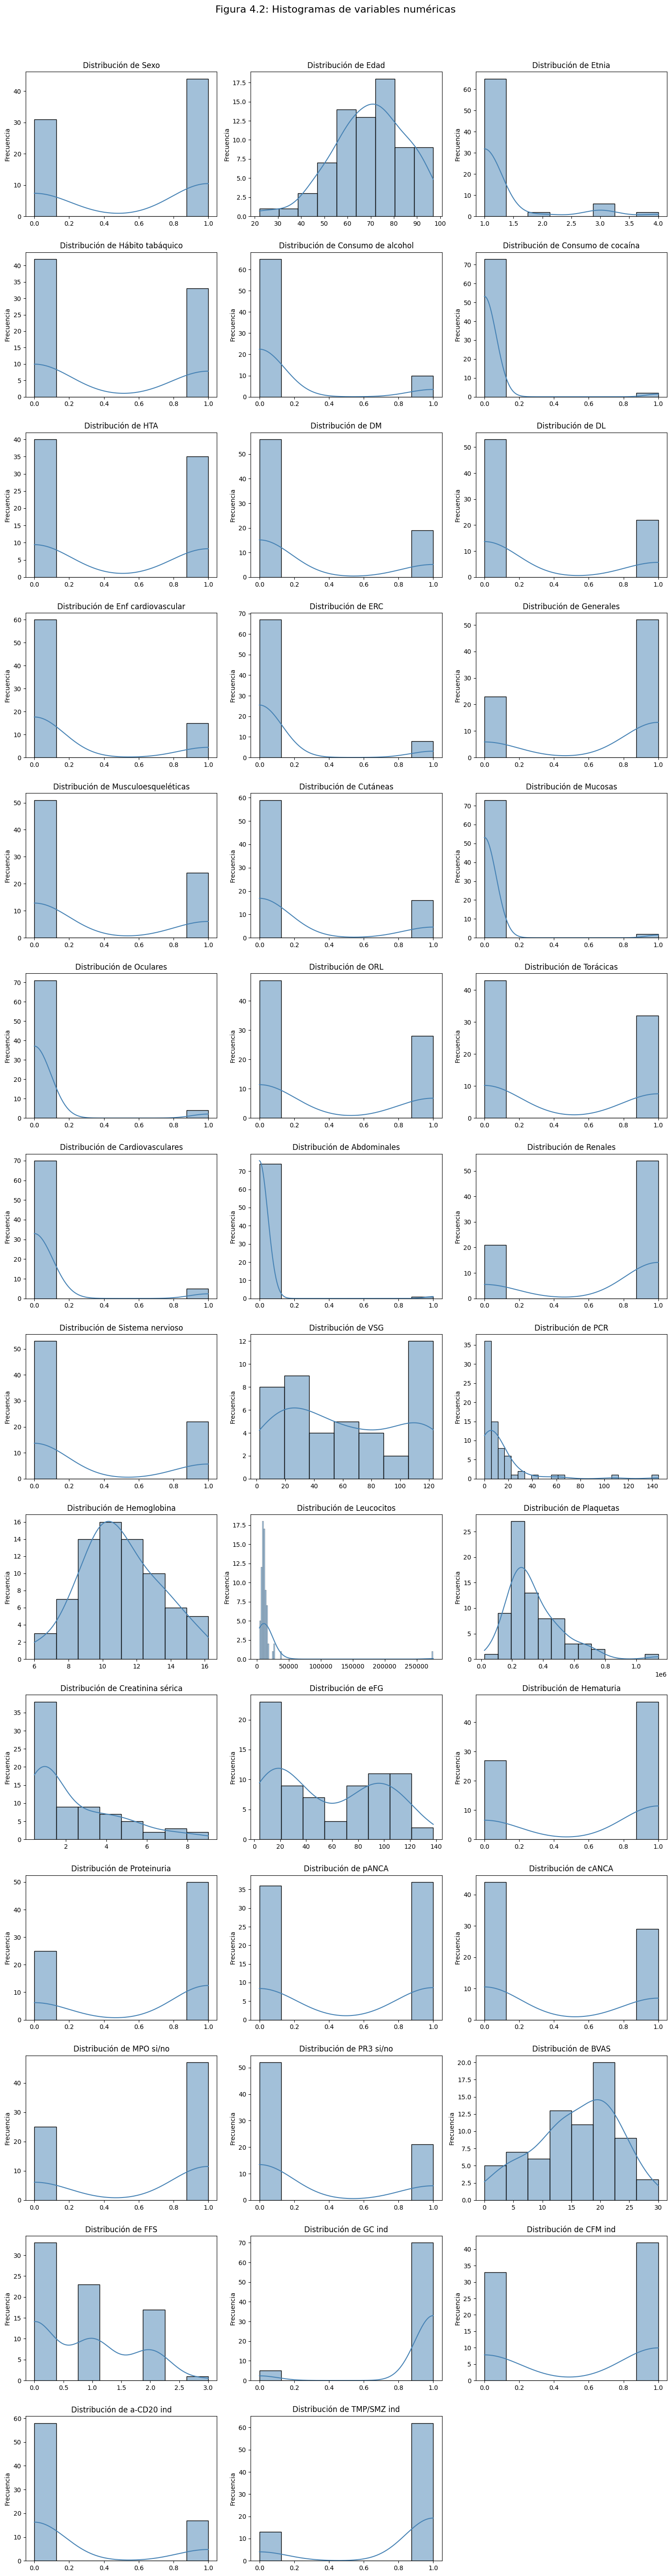

<Figure size 1500x0 with 0 Axes>

In [2]:
# === 🧩 PARTE 1: Distribución de variables ===

# Separamos numéricas y categóricas
variables_numericas = df_model.select_dtypes(include=['float64', 'int64']).columns
variables_categoricas = df_model.select_dtypes(include=['object', 'bool', 'category']).columns

# 1. Histogramas para numéricas
import math

n_cols = 3
n_rows = math.ceil(len(variables_numericas) / n_cols)
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, var in enumerate(variables_numericas):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_model[var].dropna(), kde=True, color='steelblue')
    plt.title(f'Distribución de {var}')
    plt.xlabel('')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.suptitle('Figura 4.2: Histogramas de variables numéricas', y=1.02, fontsize=16)
plt.show()

# 2. Barras para categóricas
n_cols = 3
n_rows = math.ceil(len(variables_categoricas) / n_cols)
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, var in enumerate(variables_categoricas):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df_model, x=var, palette='pastel')
    plt.title(f'Distribución de {var}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Figura 4.3: Gráficos de barras de variables categóricas', y=1.02, fontsize=16)
plt.show()
